CS7641: Machine Learning
Timothy Geraghty (tgeraghty3)
Fall 2019


Dataset Intro:
Newspapers have been in circulation for hundreds of years to inform the public of current affairs. Traditionally news has circulated in the form of print like magazines journals, and newspapers, but as the internet expanded since the 1990s, the news landscaped has dramatically shifted to-wards a digital distribution model. Instead of having mas-sive print buildings and expansive distribution networks, the internet has helped to lower the barrier of entry for news outlets while opening new revenue outlets for news stalwarts. For example, during the 2019 Q1 results, the New York Times “reported results from the paper’s digital subscription and advertising businesses” that rose 16 per-cent to $165.4 million compared to the previous period last year. 

As digital subscription continues to grow, it is important to understand the digital news landscape to continue to cap-ture readership from competitors by publishing successful articles. In order to determine whether an article would be successful or not, various characteristics were analyzed from an online news popularity dataset to determine how many shares an article would have if published [4]. This problem is interesting to machine learning researchers be-cause even though the number of shares is about 1400 for any given period, there are several articles that are below that threshold and several articles above the threshold. 

The dataset used for this project is entitled Online News Popularity and can be found at this web address: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity.

In [1]:
# Decision Tree with pruning (may use GINI for information gain)
# Neural Network
# Boosting (implement boosted version of decision tree)
# SVM (do at least two kernels)
# k-nearest neighbors (test different values of k)

# Turn in 
# README.txt with instructions to run code
# tgeraghty3-analysis.pdf for writeup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
import time

# Set random seed 
import random
random.seed(27)

# Plot inline
%matplotlib inline

Using TensorFlow backend.


In [3]:
# Create algorithms to use

# https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Need to add pruning
def decision_tree(X_train, y_train, X_test, y_test, crit, n):
    # Time training
    start = datetime.now()
    
    # Create Decision Tree classifier object
    clf = DecisionTreeClassifier(criterion = crit, max_depth = n)
    
    # Train Decision Tree Classifier
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    
    # Stop training time
    end = datetime.now() - start
    train_time = end.seconds
    
    # Start testing time
    start = datetime.now()
    
    y_pred_test = clf.predict(X_test)
    
    end = datetime.now() - start
    test_time = end.seconds
    
    # Model accuracy
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    
    return acc_train, acc_test, train_time, test_time

def ANN():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], init='uniform', activation='relu'))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dense(64, init='uniform', activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.summary()
    
    model.compile(loss='mse', optimizer='Adamax', metrics=['mse'])
    history = model.fit(X_train, y_train, epochs=5000, batch_size=50,  verbose=0, validation_split=0.2)
    
    results=model.predict(X_test)
    score1 = metrics.mean_squared_error(y_test,results )
    score2 = metrics.r2_score(y_test,results )
    return score1, score2

def boosting(X_train, y_train, X_test, y_test, n):
    # Time training
    start = datetime.now()
    
    # Create Decision Tree classifier object
    clf = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'gini', max_depth = 5), algorithm = 'SAMME', n_estimators = n, learning_rate = 0.3)
    
    # Train Decision Tree Classifier
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    
    # Stop training time
    end = datetime.now() - start
    train_time = end.seconds
    
    # Start testing time
    start = datetime.now()
    
    y_pred_test = clf.predict(X_test)
    
    end = datetime.now() - start
    test_time = end.seconds
    
    # Model accuracy
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    
    return acc_train, acc_test, train_time, test_time

def SVM():
    
    return x

def kNN(X_train, y_train, X_test, y_test, n, weight):
    # Time training
    start = datetime.now()
    
    # Create Decision Tree classifier object
    clf = KNeighborsClassifier(n_neighbors = n, weights = weight)
    
    # Train Decision Tree Classifier
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    
    # Stop training time
    end = datetime.now() - start
    train_time = end.seconds
    
    # Start testing time
    start = datetime.now()
    
    y_pred_test = clf.predict(X_test)
    
    end = datetime.now() - start
    test_time = end.seconds
    
    # Model accuracy
    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    
    return acc_train, acc_test, train_time, test_time



In [4]:
# Dataset 1: Online News Popularity
# Source: https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

# Load dataset
raw = pd.read_csv('OnlineNewsPopularity.csv', header = 0)
# Remove leading and trailing white space in column headers
raw = raw.rename(columns=lambda x: x.strip())

# Remove irrelevant columns (e.g. url)
df = raw.drop(['url'], axis = 1)

# Describe the dataset
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


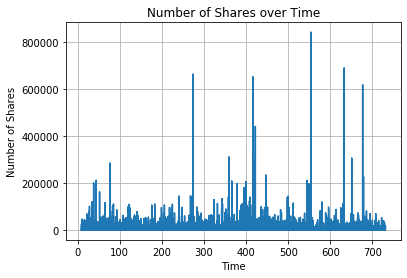

In [31]:
# Plot number of shares over time

fig = plt.figure()
plt.title('Number of Shares over Time')
plt.plot(df['timedelta'], df['shares'])
plt.xlabel('Time')
plt.ylabel('Number of Shares')
plt.grid(True)
plt.show()

In [5]:
# Create a class of data to describe if shares above/below 1400
# This transforms the problem from a continuous state to a binary state
df['class'] = np.where(df['shares'] > 1400, 1, 0)

# Drop the 'shares' data
df = df.drop(['shares'], axis = 1)

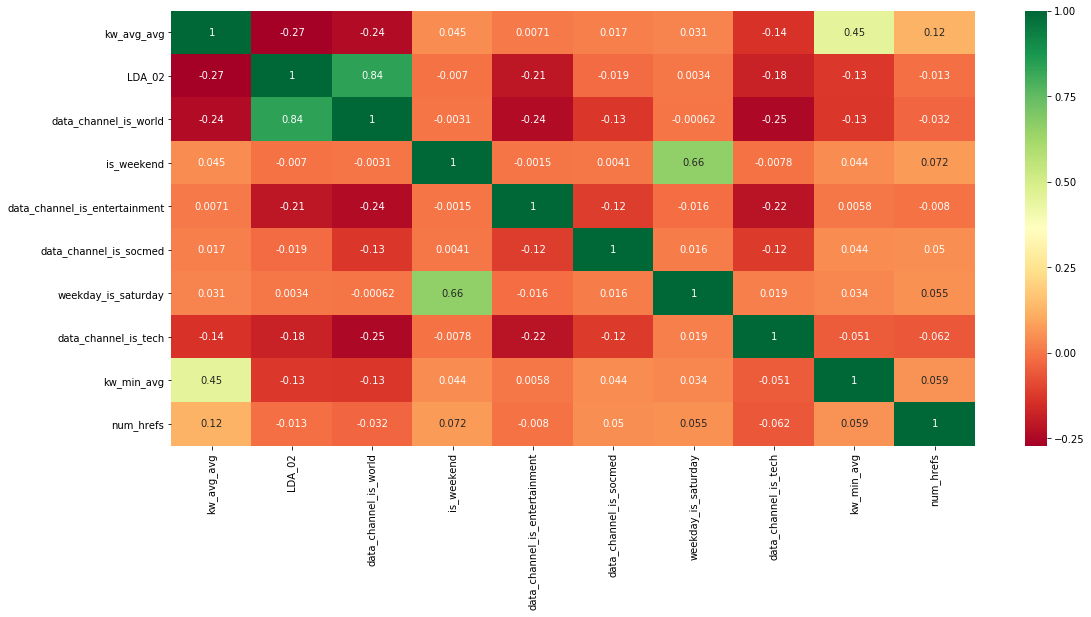

In [6]:
# Feature selection
# https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
# https://people.duke.edu/~rnau/rsquared.htm

# Correlation Analysis
df_corr = abs(df.corr())
df_corr = df_corr['class']
df_corr = pd.DataFrame(df_corr.values, df.columns).reset_index()
df_corr.columns = ['Feature', 'Corr']
df_corr = df_corr[df_corr['Corr'] > 0.06]
df_corr = df_corr.sort_values(by='Corr', ascending=False)[1:]
df_corr = df_corr.head(10)
#df_corr

# Univariate Analysis
y = df['class']
X = df.drop(['class'], axis=1)

bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores = featureScores.sort_values(by='Score', ascending=False).head(10)
#featureScores

# Determine overlap between features
idx1 = pd.Index(df_corr['Feature'])
idx2 = pd.Index(featureScores['Specs'])
features_list = idx1.intersection(idx2)
#features_list

# Create heatmap to show overlap features
X1 = X[features_list]
plt.subplots(1,1,figsize=(18,8))
sns.heatmap(X1.corr(),annot=True,cmap="RdYlGn")


In [7]:
# Remove highly correlated (redundant) features to maximize information gain
features_to_remove = ['LDA_02','weekday_is_saturday']
lst = list(features_list.values)
selected_features = [e for e in lst if e not in features_to_remove]

selected_features 

['kw_avg_avg',
 'data_channel_is_world',
 'is_weekend',
 'data_channel_is_entertainment',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'kw_min_avg',
 'num_hrefs']

In [8]:
#Split the dataset between the features (X) and target variable (y)
from sklearn.preprocessing import MinMaxScaler
X = X[selected_features]

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)
y = y

#Train, Test, Split the dataset to get the training data with a test size of 0.3
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 0)

print("Number of articles train dataset: ", len(X_train))
print("Number of article test dataset: ", len(X_test))
print("Total number of articles: ", len(X_train)+len(X_test))

Number of articles train dataset:  27750
Number of article test dataset:  11894
Total number of articles:  39644


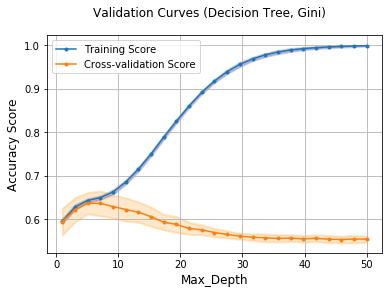

In [9]:
####################
## Decision Trees ##
####################

# https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html

# Validation Curve: Max_Depth
param_range = np.linspace(1, 50, 25)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(criterion='gini'), X, y, param_name="max_depth", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, Gini)', fontsize=12)
plt.xlabel('Max_Depth', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

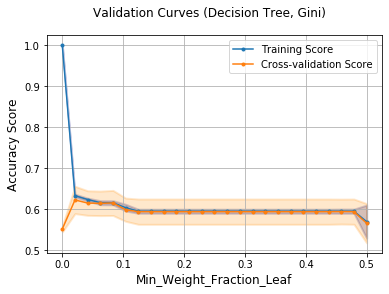

In [10]:
# Validation Curve: min_weight_fraction_leaf
param_range = np.linspace(0, 0.5, 25)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(criterion='gini'), X, y, param_name="min_weight_fraction_leaf", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, Gini)', fontsize=12)
plt.xlabel('Min_Weight_Fraction_Leaf', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

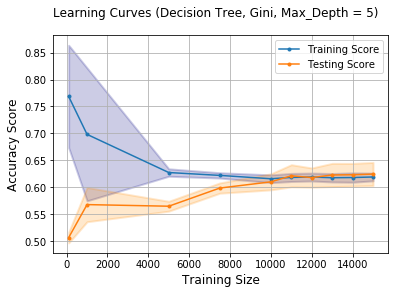

In [11]:
# Cross validation to determine training size
train_sizes, train_scores, valid_scores = learning_curve(DecisionTreeClassifier(criterion='gini', max_depth = 5), X, y, train_sizes=[100, 1000, 5000, 7500, 10000, 11000, 12000, 13000, 14000, 15000], cv=7)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

lw=2

fig = plt.figure()
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(train_sizes, valid_scores_mean, label = 'Testing Score',  marker = '.')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Learning Curves (Decision Tree, Gini, Max_Depth = 5)', fontsize=12)
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()


In [12]:
# # Run Decision Tree Algorithm
# # https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# train_acc = []
# test_acc = []
# train_elapsed = []
# test_elapsed = []


# min = 1
# max = 20

# for depth in np.linspace(min, max, max):
#     acc_train, acc_test, train_time, test_time = decision_tree(X_train, y_train, X_test, y_test, 'gini', depth)
#     train_acc.append(acc_train)
#     test_acc.append(acc_test)
#     train_elapsed.append(train_time)
#     test_elapsed.append(test_time)

# # Plot results
# depth = np.linspace(min, max, max)

# fig = plt.figure()
# plt.plot(depth, train_acc, label = 'Training Accuracy')
# plt.plot(depth, test_acc, label = 'Testing Accuracy')
# fig.suptitle('Decision Tree Accuracy vs. Depth', fontsize=14)
# plt.xlabel('Depth', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend()
# #fig.savefig('test.jpg')


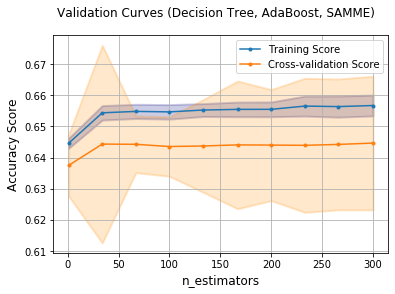

In [13]:
#####################
##### Boosting ######
#####################

# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
    
# Validation Curve: n_estimators
param_range = np.linspace(1, 300, 10, dtype = int)
train_scores, valid_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, criterion = 'gini'), algorithm = 'SAMME'), X_train, y_train, param_name="n_estimators", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, AdaBoost, SAMME)', fontsize=12)
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

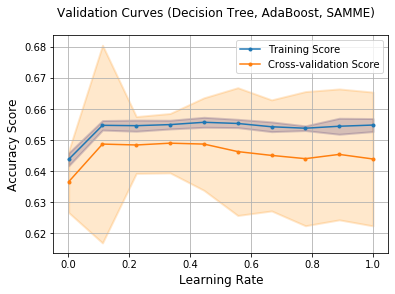

In [14]:
# Validation Curve: learning rate
param_range = np.linspace(0.001, 1, 10, dtype=float)
train_scores, valid_scores = validation_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, criterion = 'gini'), algorithm = 'SAMME'), X_train, y_train, param_name="learning_rate", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-2)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (Decision Tree, AdaBoost, SAMME)', fontsize=12)
plt.xlabel('Learning Rate', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

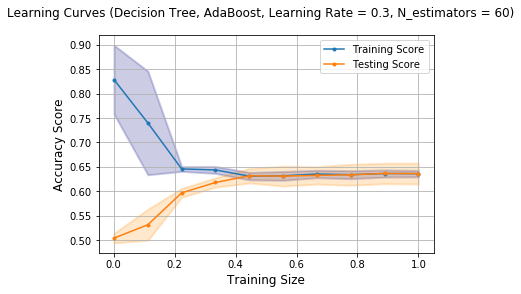

In [15]:
# Cross validation to determine training size
train_sizes, train_scores, valid_scores = learning_curve(AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, criterion = 'gini'), algorithm = 'SAMME', n_estimators = 60, learning_rate = 0.3), X, y, train_sizes=[100, 1000, 5000, 7500, 10000, 11000, 12000, 13000, 14000, 15000], cv=7)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
test_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Testing Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Learning Curves (Decision Tree, AdaBoost, Learning Rate = 0.3, N_estimators = 60)', fontsize=12)
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

In [16]:
# # Run Decision Tree Algorithm with AdaBoost
# # https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# train_acc = []
# test_acc = []
# train_elapsed = []
# test_elapsed = []


# min = 1
# max = 500

# for n in np.linspace(min, max, 10, dtype=int):
#     acc_train, acc_test, train_time, test_time = boosting(X_train, y_train, X_test, y_test, n)
#     train_acc.append(acc_train)
#     test_acc.append(acc_test)
#     train_elapsed.append(train_time)
#     test_elapsed.append(test_time)

# # Plot results
# n_estimators = np.linspace(min, max, 10)

# fig = plt.figure()
# plt.plot(n_estimators, train_acc, label = 'Training Accuracy')
# plt.plot(n_estimators, test_acc, label = 'Testing Accuracy')
# fig.suptitle('Decision Tree Accuracy with AdaBoost vs. Number of Estimators', fontsize=14)
# plt.xlabel('Number of Estimators', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend()
# #fig.savefig('test.jpg')



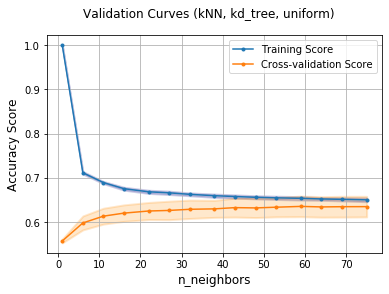

In [17]:
####################
####### kNN ########
####################

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    
# Validation Curve: 
param_range = np.linspace(1, 75, 15, dtype = int)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform'), X, y, param_name="n_neighbors", param_range=param_range, cv=7, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (kNN, kd_tree, uniform)', fontsize=12)
plt.xlabel('n_neighbors', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

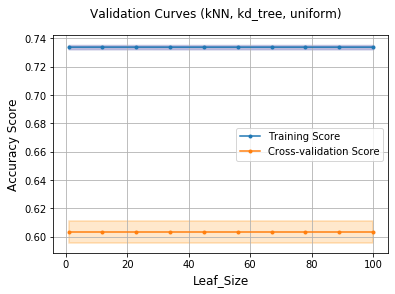

In [18]:
# Validation Curve: min_weight_fraction_leaf
param_range = np.linspace(1, 100, 10, dtype=int)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform'), X_train, y_train, param_name="leaf_size", param_range=param_range, cv=7, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (kNN, kd_tree, uniform)', fontsize=12)
plt.xlabel('Leaf_Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

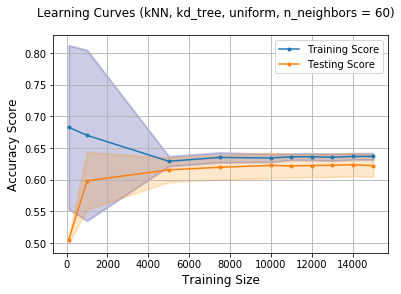

In [32]:
# Cross validation to determine training size
train_sizes, train_scores, valid_scores = learning_curve(KNeighborsClassifier(algorithm = 'kd_tree', weights = 'uniform', n_neighbors = 60), X, y, train_sizes=[100, 1000, 5000, 7500, 10000, 11000, 12000, 13000, 14000, 15000], cv=7)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(train_sizes, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(train_sizes, valid_scores_mean, label = 'Testing Score',  marker = '.')
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Learning Curves (kNN, kd_tree, uniform, n_neighbors = 60)', fontsize=12)
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

In [20]:
# # Run kNN Algorithm
# # https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv
# train_acc_u = []
# test_acc_u = []
# train_elapsed_u = []
# test_elapsed_u = []
# train_acc_d = []
# test_acc_d = []
# train_elapsed_d = []
# test_elapsed_d = []

# min = 1
# max = 40

# for neighbor in np.linspace(min, max, max, dtype=int):
#     acc_train_u, acc_test_u, train_time_u, test_time_u = kNN(X_train, y_train, X_test, y_test, neighbor, 'uniform')
#     train_acc_u.append(acc_train_u)
#     test_acc_u.append(acc_test_u)
#     train_elapsed_u.append(train_time_u)
#     test_elapsed_u.append(test_time_u)
#     acc_train_d, acc_test_d, train_time_d, test_time_d = kNN(X_train, y_train, X_test, y_test, neighbor, 'distance')
#     train_acc_d.append(acc_train_d)
#     test_acc_d.append(acc_test_d)
#     train_elapsed_d.append(train_time_d)
#     test_elapsed_d.append(test_time_d)

# # Plot results
# neighbors = np.linspace(min, max, max)

# fig = plt.figure(figsize=(18,8))
# plt.subplot(1, 3, 1)
# plt.plot(neighbors, train_acc_u, label = 'Unweighted Training Accuracy')
# plt.plot(neighbors, test_acc_u, label = 'Unweighted Testing Accuracy')
# fig.suptitle('kNN Accuracy vs. N-Neighbors', fontsize=20)
# plt.xlabel('Number of Neighbors', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend()
# plt.subplot(1, 3, 2)
# plt.plot(neighbors, train_acc_d, label = 'Weighted Training Accuracy')
# plt.plot(neighbors, test_acc_d, label = 'Weighted Testing Accuracy')
# fig.suptitle('kNN Accuracy vs. N-Neighbors', fontsize=20)
# plt.xlabel('Number of Neighbors', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12)
# plt.legend()
# plt.subplot(1, 3, 3)
# plt.plot(neighbors, test_acc_u, label = 'Unweighted Testing Accuracy')
# plt.plot(neighbors, test_acc_d, label = 'Weighted Testing Accuracy')
# fig.suptitle('kNN Accuracy vs. N-Neighbors', fontsize=20)
# plt.xlabel('Number of Neighbors', fontsize=12)
# plt.ylabel('Accuracy', fontsize=12

# plt.legend()
# #fig.savefig('test.jpg')



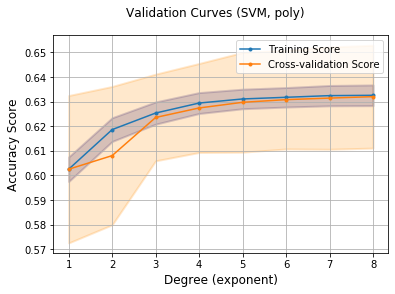

In [21]:
####################
####### SVM ########
####################

# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
    
# Validation Curve: Poly
param_range = np.linspace(1,8, 8, dtype = int)
train_scores, valid_scores = validation_curve(SVC(kernel = 'poly', gamma = 'auto'), X, y, param_name="degree", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (SVM, poly)', fontsize=12)
plt.xlabel('Degree (exponent)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

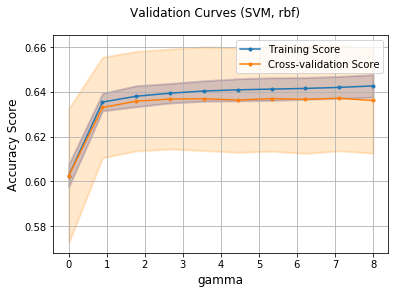

In [22]:
# Validation Curve: rbf
param_range = np.linspace(0.001, 8, 10, dtype=float)
train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf'), X, y, param_name="gamma", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (SVM, rbf)', fontsize=12)
plt.xlabel('gamma', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

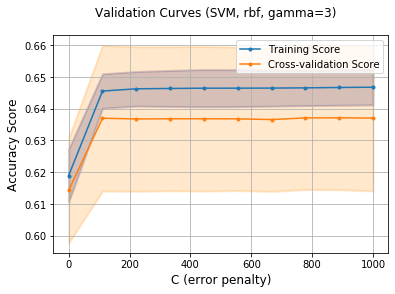

In [23]:
# Validation Curve: rbf, vary C
param_range = np.linspace(0.001, 1000, 10, dtype=float)
train_scores, valid_scores = validation_curve(SVC(kernel = 'rbf', gamma = 3), X, y, param_name="C", param_range=param_range, cv=7, scoring="accuracy", n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Cross-validation Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
fig.suptitle('Validation Curves (SVM, rbf, gamma=3)', fontsize=12)
plt.xlabel('C (error penalty)', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

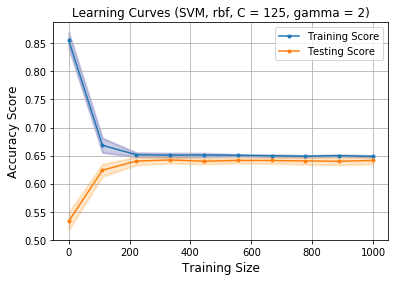

In [24]:
# Cross validation to determine training size
train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel = 'rbf', C = 125, gamma = 2), X_train, y_train, train_sizes=[100, 1000, 5000, 7500, 10000, 11000, 12000, 13000, 14000, 15000], cv=7)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)
                  
lw=2

fig = plt.figure()
plt.plot(param_range, train_scores_mean, label = 'Training Score', marker = '.')
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.plot(param_range, valid_scores_mean, label = 'Testing Score',  marker = '.')
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.title('Learning Curves (SVM, rbf, C = 125, gamma = 2)', fontsize=12)
plt.xlabel('Training Size', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.grid(True)
plt.legend()

W0921 04:33:02.453876  6524 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
W0921 04:33:02.469864  6524 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0921 04:33:02.471871  6524 deprecation_wrapper.py:119] From C:\Users\tg784d\anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: Use

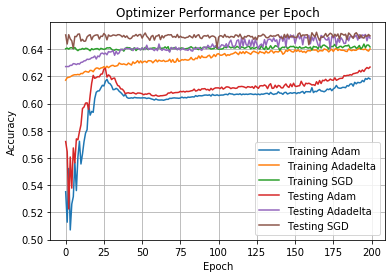

In [25]:
####################
####### ANN ########
####################

#https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
#https://medium.com/the-theory-of-everything/understanding-activation-functions-in-neural-networks-9491262884e0
#for act in ['relu', 'sigmoid']:

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model_adam = model
model_adadelta = model
model_sgd = model
model_adam.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
model_adadelta.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])
model_sgd.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


# Fit the model
#history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
history_adam = model_adam.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
history_adadelta = model_adadelta.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
history_sgd = model_adadelta.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)

# summarize history for accuracy
fig = plt.figure()
plt.plot(history_adam.history['acc'], label = 'Training Adam')
plt.plot(history_adadelta.history['acc'], label = 'Training Adadelta')
plt.plot(history_sgd.history['acc'], label = 'Training SGD')
plt.plot(history_adam.history['val_acc'], label = 'Testing Adam')
plt.plot(history_adadelta.history['val_acc'], label = 'Testing Adadelta')
plt.plot(history_sgd.history['val_acc'], label = 'Testing SGD')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Optimizer Performance per Epoch')
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]


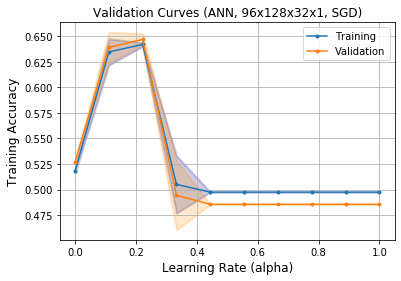

In [26]:
# SGD Optimizer
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

train_acc = []
val_acc = []
train_std = []
val_std = []

# Create model
model = Sequential()
model.add(Dense(96, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
for alpha in np.linspace(0.0001, 1, 10):
    sgd = optimizers.SGD(lr=alpha, momentum=0.0, nesterov=False)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
    train_acc_n = np.mean(history.history['acc'])
    train_std_n = np.std(history.history['acc'])
    val_acc_n = np.mean(history.history['val_acc'])
    val_std_n = np.std(history.history['val_acc'])
    
    # Append data
    train_acc.append(train_acc_n)
    val_acc.append(val_acc_n)
    train_std.append(train_std_n)
    val_std.append(val_std_n)
    
lw = 2    
param_range = np.linspace(0.0001, 1, 10)

fig = plt.figure()
plt.plot(param_range, train_acc, label = 'Training', marker = '.')
plt.fill_between(param_range, np.array(train_acc) - np.array(train_std),
                np.array(train_acc) + np.array(train_std), alpha=0.2,
                color="navy", lw=lw)
plt.plot(param_range, val_acc, label = 'Validation', marker = '.')
plt.fill_between(param_range, np.array(val_acc) - np.array(val_std),
                np.array(val_acc) + np.array(val_std), alpha=0.2,
                color="darkorange", lw=lw)
plt.title('Validation Curves (ANN, 96x128x32x1, SGD)', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)
plt.xlabel('Learning Rate (alpha)', fontsize=12)
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  del sys.path[0]
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  


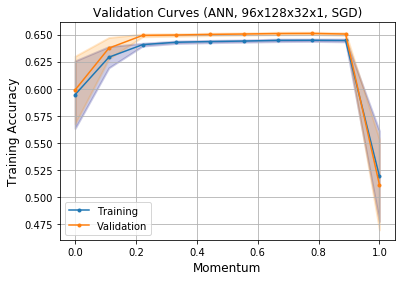

In [27]:
# SGD Optimizer
# https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/
from keras import optimizers

train_acc = []
val_acc = []
train_std = []
val_std = []

# Create model
model = Sequential()
model.add(Dense(96, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Compile the model
for mom in np.linspace(0.0001, 1, 10):
    sgd = optimizers.SGD(lr=0.01, momentum=mom, nesterov=False)
    model.compile(loss='mse', optimizer=sgd, metrics=['accuracy'])
    
    # Fit the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=128, verbose = 0)
    train_acc_n = np.mean(history.history['acc'])
    train_std_n = np.std(history.history['acc'])
    val_acc_n = np.mean(history.history['val_acc'])
    val_std_n = np.std(history.history['acc'])
    
    # Append data
    train_acc.append(train_acc_n)
    val_acc.append(val_acc_n)
    train_std.append(train_std_n)
    val_std.append(val_std_n)
    
lw = 2    
param_range = np.linspace(0.0001, 1, 10)

fig = plt.figure()
plt.plot(param_range, train_acc, label = 'Training', marker = '.')
plt.fill_between(param_range, np.array(train_acc) - np.array(train_std),
                np.array(train_acc) + np.array(train_std), alpha=0.2,
                color="navy", lw=lw)
plt.plot(param_range, val_acc, label = 'Validation', marker = '.')
plt.fill_between(param_range, np.array(val_acc) - np.array(val_std),
                np.array(val_acc) + np.array(val_std), alpha=0.2,
                color="darkorange", lw=lw)
plt.title('Validation Curves (ANN, 96x128x32x1, SGD)', fontsize=12)
plt.ylabel('Training Accuracy', fontsize=12)
plt.xlabel('Momentum', fontsize=12)
plt.grid(True)
plt.legend()

C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(96, input_dim=8, activation="relu", kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\tg784d\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


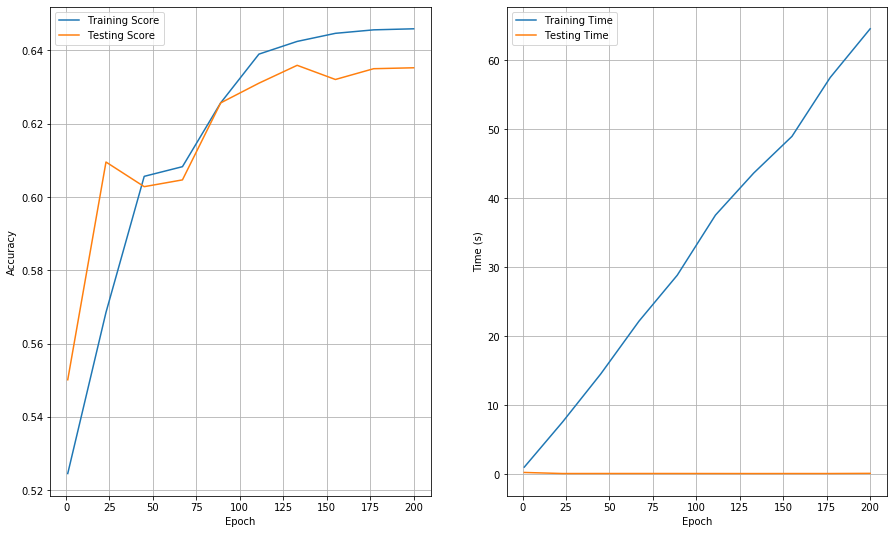

In [28]:
# Learning Curve using optimized hyperparameters
train_acc = []
test_acc = []
train_time = []
test_time = []

# Create Model Architecture
model = Sequential()
model.add(Dense(96, input_dim=X_train.shape[1], init='uniform', activation='relu'))
model.add(Dense(128, init='uniform', activation='relu'))
model.add(Dense(32, init='uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
sgd = optimizers.SGD(lr=0.25, momentum=0.25, nesterov=False)
model.compile(loss='mse', optimizer='sgd', metrics=['accuracy'])


# Fit the model and test
n_epochs = np.linspace(1,200,10, dtype=int)

for n in n_epochs:
    train = time.time()
    history = model.fit(X_train, y_train, epochs=n, batch_size=128, verbose = 0)
    train_epoch = time.time() - train 
    test = time.time()
    results = model.evaluate(X_test, y_test, batch_size=128, verbose = 0)
    test_epoch = time.time() - test
    #print(results[1])
    
    # Append data
    train_avg = np.mean(history.history['acc'])
    test_avg = np.mean(results[1])
    train_acc.append(train_avg)
    test_acc.append(test_avg)
    train_time.append(train_epoch)
    test_time.append(test_epoch)
#history_adadelta = model_adadelta.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=10)

# summarize history for accuracy
fig = plt.figure(figsize=(15,9))
plt.subplot(1, 2, 1)
plt.plot(n_epochs, train_acc, label = 'Training Score')
plt.plot(n_epochs, test_acc, label = 'Testing Score')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(n_epochs, train_time, label = 'Training Time')
plt.plot(n_epochs, test_time, label = 'Testing Time')
plt.ylabel('Time (s)')
plt.xlabel('Epoch')
plt.grid(True)
plt.legend()